🔷 Frozen Lake Map:
[[b'S' b'F' b'F' b'F']
 [b'F' b'H' b'F' b'H']
 [b'F' b'F' b'F' b'H']
 [b'H' b'F' b'F' b'G']]
🛤️ Solution Path: ([0, 4, 8, 9, 13, 14, 15], 0.00016808509826660156)
🔷 Frozen Lake Map:
[[b'S' b'F' b'F' b'F']
 [b'F' b'H' b'F' b'H']
 [b'F' b'F' b'F' b'H']
 [b'H' b'F' b'F' b'G']]
🛤️ Solution Path: ([0, 4, 8, 9, 13, 14, 15], 0.00011491775512695312)
🔷 Frozen Lake Map:
[[b'S' b'F' b'F' b'F']
 [b'F' b'H' b'F' b'H']
 [b'F' b'F' b'F' b'H']
 [b'H' b'F' b'F' b'G']]
🛤️ Solution Path: ([0, 4, 8, 9, 13, 14, 15], 9.584426879882812e-05)
🔷 Frozen Lake Map:
[[b'S' b'F' b'F' b'F']
 [b'F' b'H' b'F' b'H']
 [b'F' b'F' b'F' b'H']
 [b'H' b'F' b'F' b'G']]
🛤️ Solution Path: ([0, 4, 8, 9, 13, 14, 15], 0.0002636909484863281)
🔷 Frozen Lake Map:
[[b'S' b'F' b'F' b'F']
 [b'F' b'H' b'F' b'H']
 [b'F' b'F' b'F' b'H']
 [b'H' b'F' b'F' b'G']]
🛤️ Solution Path: ([0, 4, 8, 9, 13, 14, 15], 0.00010752677917480469)


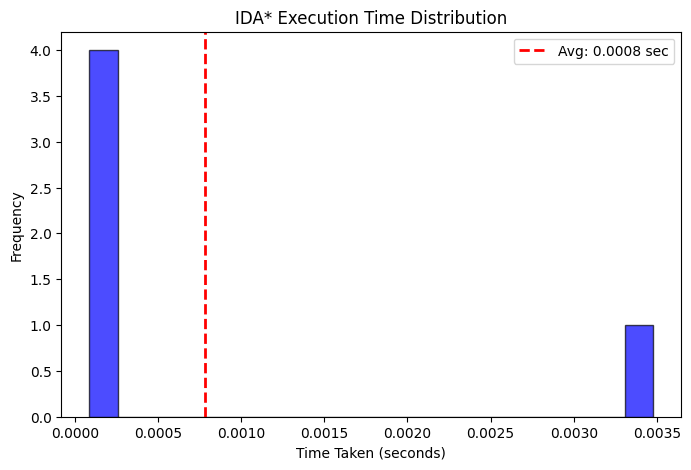

✅ Average Time Taken Over 5 Runs: 0.0008 seconds


In [ ]:
import gymnasium as gym
import numpy as np
import time
import matplotlib.pyplot as plt

class IDAStarFrozenLake:
    def __init__(self, env):
        self.env = env
        self.size = int(np.sqrt(env.observation_space.n))  # Grid size (4x4)
        self.goal = env.observation_space.n - 1  # Goal state (15)

    def heuristic(self, state):
        """Manhattan Distance Heuristic"""
        x, y = divmod(state, self.size)
        gx, gy = divmod(self.goal, self.size)
        return abs(gx - x) + abs(gy - y)

    def get_neighbors(self, state):
        """Returns valid neighboring states."""
        neighbors = []
        for action in range(4):  # 4 possible moves (LEFT, DOWN, RIGHT, UP)
            transitions = self.env.unwrapped.P[state][action]
            for prob, next_state, reward, done in transitions:
                neighbors.append((next_state, action, done))
        return neighbors

    def search(self, state, g, bound, path):
        """Recursive depth-first search with cost bound pruning."""
        f = g + self.heuristic(state)
        if f > bound:
            return f, None

        if state == self.goal:
            return f, path

        min_cost = float("inf")
        for next_state, action, done in self.get_neighbors(state):
            if next_state in path:
                continue  # Avoid cycles

            new_path = path + [next_state]  # Store the correct path
            cost, result = self.search(next_state, g + 1, bound, new_path)

            if result is not None:
                return cost, result

            min_cost = min(min_cost, cost)

        return min_cost, None

    def solve(self):
        """Runs the IDA* algorithm until a solution is found."""
        start_time = time.time()
        initial_state, _ = self.env.reset()  # Reset the environment properly
        bound = self.heuristic(initial_state)
        path = [initial_state]

        while True:
            cost, result = self.search(initial_state, 0, bound, path)

            if result is not None:
                end_time = time.time()
                return result, end_time - start_time

            if cost == float("inf"):
                return None, None

            bound = cost  # Increase bound dynamically

# Initialize Gymnasium FrozenLake environment
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="ansi")


# Run multiple trials to calculate average time
num_trials = 5
times = []

for _ in range(num_trials):
    solver = IDAStarFrozenLake(env)
    _, exec_time = solver.solve()
    print("🔷 Frozen Lake Map:")
    print(env.unwrapped.desc)

    # Run IDA* search
    solver = IDAStarFrozenLake(env)
    solution = solver.solve()
    print("🛤️ Solution Path:", solution)
    if exec_time is not None:
        times.append(exec_time)

# Compute average time
average_time = np.mean(times)

# Plot results
plt.figure(figsize=(8, 5))
plt.hist(times, bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.axvline(average_time, color='red', linestyle='dashed', linewidth=2, label=f'Avg: {average_time:.4f} sec')
plt.xlabel("Time Taken (seconds)")
plt.ylabel("Frequency")
plt.title("IDA* Execution Time Distribution")
plt.legend()
plt.show()

print(f"✅ Average Time Taken Over {num_trials} Runs: {average_time:.4f} seconds")


🔷 Frozen Lake Map:
[[b'S' b'F' b'F' b'F']
 [b'F' b'H' b'F' b'H']
 [b'F' b'F' b'F' b'H']
 [b'H' b'F' b'F' b'G']]
🛤️ Solution Path: [0, 4, 8, 9, 13, 14, 15]
🔷 Frozen Lake Map:
[[b'S' b'F' b'F' b'F']
 [b'F' b'H' b'F' b'H']
 [b'F' b'F' b'F' b'H']
 [b'H' b'F' b'F' b'G']]
🛤️ Solution Path: [0, 4, 8, 9, 13, 14, 15]
🔷 Frozen Lake Map:
[[b'S' b'F' b'F' b'F']
 [b'F' b'H' b'F' b'H']
 [b'F' b'F' b'F' b'H']
 [b'H' b'F' b'F' b'G']]
🛤️ Solution Path: [0, 4, 8, 9, 13, 14, 15]
🔷 Frozen Lake Map:
[[b'S' b'F' b'F' b'F']
 [b'F' b'H' b'F' b'H']
 [b'F' b'F' b'F' b'H']
 [b'H' b'F' b'F' b'G']]
🛤️ Solution Path: [0, 4, 8, 9, 13, 14, 15]
🔷 Frozen Lake Map:
[[b'S' b'F' b'F' b'F']
 [b'F' b'H' b'F' b'H']
 [b'F' b'F' b'F' b'H']
 [b'H' b'F' b'F' b'G']]
🛤️ Solution Path: [0, 4, 8, 9, 13, 14, 15]


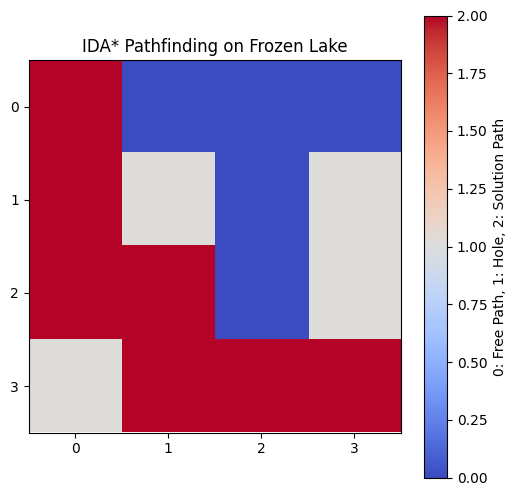

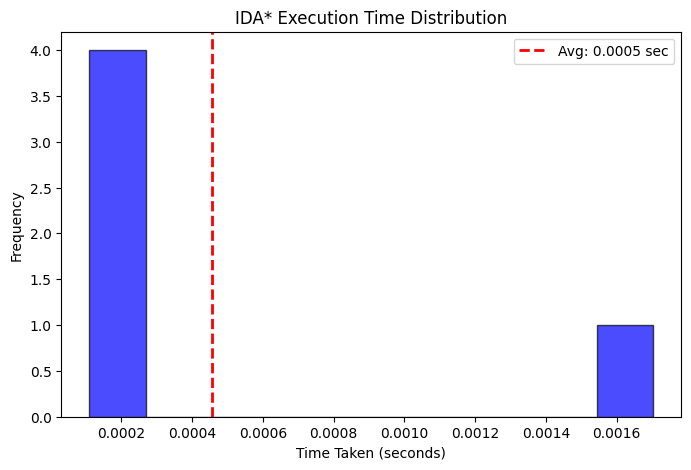

✅ Average Time Taken Over 5 Runs: 0.0005 seconds


In [ ]:
import gymnasium as gym
import numpy as np
import time
import matplotlib.pyplot as plt

class IDAStarFrozenLake:
    def __init__(self, env):
        self.env = env
        self.size = int(np.sqrt(env.observation_space.n))  # Grid size (4x4)
        self.goal = env.observation_space.n - 1  # Goal state (15)

    def heuristic(self, state):
        """Manhattan Distance Heuristic"""
        x, y = divmod(state, self.size)
        gx, gy = divmod(self.goal, self.size)
        return abs(gx - x) + abs(gy - y)

    def get_neighbors(self, state):
        """Returns valid neighboring states."""
        neighbors = []
        for action in range(4):  # 4 possible moves (LEFT, DOWN, RIGHT, UP)
            transitions = self.env.unwrapped.P[state][action]
            for prob, next_state, reward, done in transitions:
                neighbors.append((next_state, action, done))
        return neighbors

    def search(self, state, g, bound, path):
        """Recursive depth-first search with cost bound pruning."""
        f = g + self.heuristic(state)
        if f > bound:
            return f, None

        if state == self.goal:
            return f, path

        min_cost = float("inf")
        for next_state, action, done in self.get_neighbors(state):
            if next_state in path:
                continue  # Avoid cycles

            new_path = path + [next_state]  # Store the correct path
            cost, result = self.search(next_state, g + 1, bound, new_path)

            if result is not None:
                return cost, result

            min_cost = min(min_cost, cost)

        return min_cost, None

    def solve(self):
        """Runs the IDA* algorithm until a solution is found."""
        start_time = time.time()
        initial_state, _ = self.env.reset()
        bound = self.heuristic(initial_state)
        path = [initial_state]

        while True:
            cost, result = self.search(initial_state, 0, bound, path)

            if result is not None:
                end_time = time.time()
                return result, end_time - start_time

            if cost == float("inf"):
                return None, None

            bound = cost  # Increase bound dynamically

# Initialize Gymnasium FrozenLake environment
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="ansi")

# Run multiple trials to calculate average time
num_trials = 5
times = []
paths = []

for _ in range(num_trials):
    solver = IDAStarFrozenLake(env)
    path, exec_time = solver.solve()
    paths.append(path)
    print("🔷 Frozen Lake Map:")
    print(env.unwrapped.desc)
    print("🛤️ Solution Path:", path)
    if exec_time is not None:
        times.append(exec_time)

# Compute average time
average_time = np.mean(times)

# Visualizing the Frozen Lake Solution
lake = np.array([[0 if cell != b'H' else 1 for cell in row] for row in env.unwrapped.desc])
maze_display = np.copy(lake)

# Mark solution path in the grid
for pos in paths[0]:  # Use first solution path found
    x, y = divmod(pos, 4)
    maze_display[x, y] = 2  # Mark path with '2'

plt.figure(figsize=(6, 6))
plt.imshow(maze_display, cmap="coolwarm", interpolation="nearest")
plt.xticks(range(lake.shape[1]))
plt.yticks(range(lake.shape[0]))
plt.title("IDA* Pathfinding on Frozen Lake")
plt.colorbar(label="0: Free Path, 1: Hole, 2: Solution Path")
plt.show()

# Plot Execution Time Distribution
plt.figure(figsize=(8, 5))
plt.hist(times, bins=10, color='blue', alpha=0.7, edgecolor='black')
plt.axvline(average_time, color='red', linestyle='dashed', linewidth=2, label=f'Avg: {average_time:.4f} sec')
plt.xlabel("Time Taken (seconds)")
plt.ylabel("Frequency")
plt.title("IDA* Execution Time Distribution")
plt.legend()
plt.show()

print(f"✅ Average Time Taken Over {num_trials} Runs: {average_time:.4f} seconds")
